# Life Expectancy Regression Report

## Problem definition and objectives

Life expecatancy is influenced by a range of factors. 

This report aims to model life expectancy based on the data given in the [World Health Organisation's dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download). We will do this using a multivariate linear regression model. 

If only interested in a summary of the results, please navigate directly to the 'Conclusion' section of the report.


# Detailed Analysis

In [68]:
# Import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [7]:
# Import data

df = pd.read_csv('Life Expectancy Data.csv')

## Inspect the Data

For the initial incpestion, we first if we need to clean the data.

In [8]:
# Check if data loaded correctly

df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [9]:
# Check data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

There is a mixture of numerical and categorical data types. Therefore, we will need to inspect these types of data seperately. 

We want to predict the Life expectancy column. Therefore we will drop all null data within this column.

In [11]:
# Droping null data within Life expectancy column 

df = df.dropna(subset=['Life expectancy '])

### Creating a training set

We want to train and test our model within this data set. Therefore, we need to select a subsection of the data to use as a training set, against which we can compare the results on the test data. 

In [12]:
# Creating a training set to work with.

X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

train_data,test_data = train_test_split(df, test_size=.2, random_state=42)

We will do all inspections from now on using the training set, as that is what is 'visible' to us when we train our model.

In [13]:
# Check for null values

train_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            155
percentage expenditure               0
Hepatitis B                        444
Measles                              0
 BMI                                26
under-five deaths                    0
Polio                               14
Total expenditure                  182
Diphtheria                          14
 HIV/AIDS                            0
GDP                                347
Population                         511
 thinness  1-19 years               26
 thinness 5-9 years                 26
Income composition of resources    130
Schooling                          130
dtype: int64

There are null values present within the data. Once we are aware of the distributions of each variable, we will decide on methods to deal with these null values.

### Numerical Data

For numerical data, we will first inspect histograms to see the distributions of the data.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

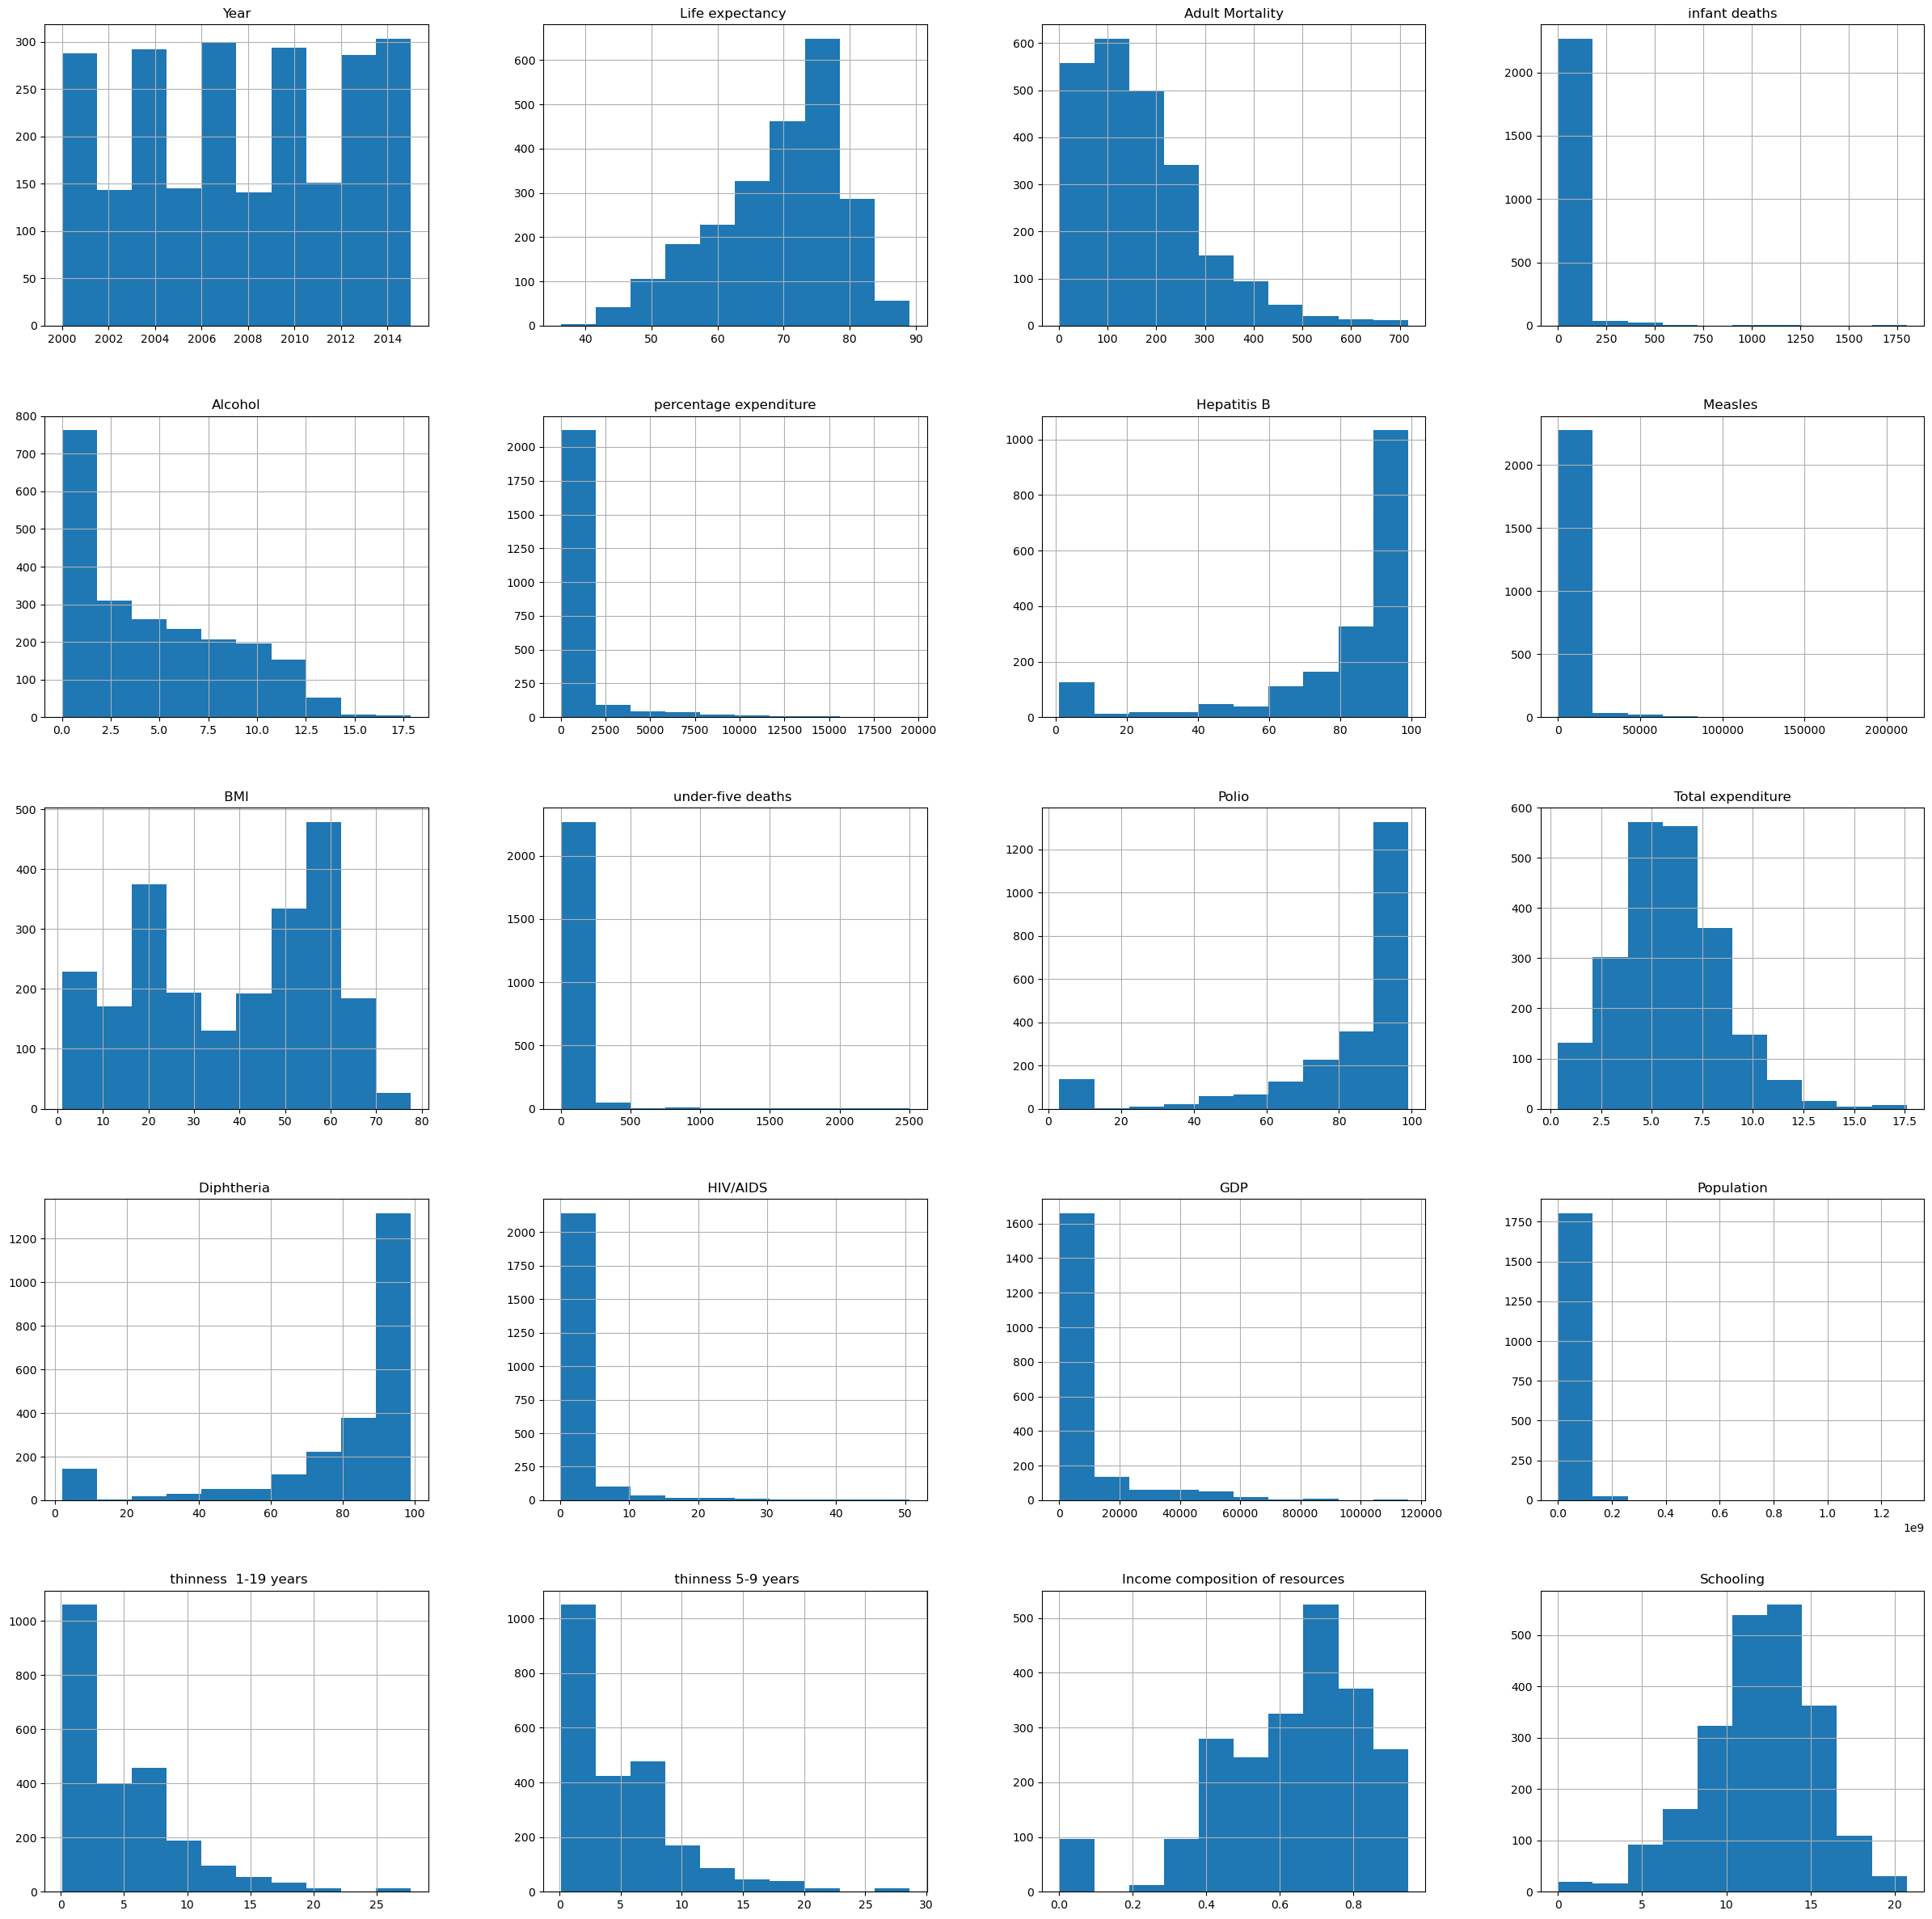

In [15]:
# Produce historgrams for all numerical columns

train_data.hist(figsize=(30, 30))

Not all of the data appears normally distributed within these historgrams. We will look at the skewedness of the data and then transform variable to reduce this skewed value. 

In [16]:
# Selecting the numerical data columns

numeric_col = train_data.select_dtypes(include= "number").columns
numeric_cols = numeric_col[numeric_col != 'Life expectancy ']

# Inspecting the skewedness of these columns 

original_skewness = train_data[numeric_cols].skew()
original_skewness

Year                               -0.006814
Adult Mortality                     1.169312
infant deaths                       9.709195
Alcohol                             0.597701
percentage expenditure              4.512307
Hepatitis B                        -1.908250
Measles                             9.402678
 BMI                               -0.206544
under-five deaths                   9.418616
Polio                              -2.064445
Total expenditure                   0.606437
Diphtheria                         -2.041765
 HIV/AIDS                           5.359182
GDP                                 3.112649
Population                         17.605151
 thinness  1-19 years               1.673095
 thinness 5-9 years                 1.734047
Income composition of resources    -1.097248
Schooling                          -0.525447
dtype: float64

In [18]:
# Split the types of data into positive, negative skewed and symmetrical.
# These produced lists with the column names for each type of skew.

positive_skewed = original_skewness[original_skewness>.5].index
negative_skewed = original_skewness[original_skewness< -.5].index
symmetric_distributed = [" BMI "]

Later in our regression model, we will deal with the skewedness of data in preprocessing. However, to test our model to see whcih preprocessing is suitable, we make a copy of the the training dataset which we are able to manipulate. Then we can see: 
1. How to deal with null values
2. Which transformation most effectively reduced skewedness

These will then be implemented in our regression pipeline.

In [20]:
# Create a copy of the training data 

copy = train_data.copy()

In [21]:
# Replacing skewed null values with the median value and symmetric null values with the mean

imputer = SimpleImputer(strategy="median")
imputer1 = SimpleImputer(strategy="mean")
copy[positive_skewed] = imputer.fit_transform(copy[positive_skewed])
copy[negative_skewed] = imputer.fit_transform(copy[negative_skewed])
copy[symmetric_distributed] = imputer1.fit_transform(copy[symmetric_distributed])
copy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Now we have no null values, we are able to proceed with transformations. 

#### Postively Skewed Data

In [24]:
# Creating a Skewness function to return the skew values

def calculate_skewness(df):
    return df.apply(skew)

# We evaulte differenet transformations to see which is most effective. These our the transformations

log_transformer = FunctionTransformer(np.log1p, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
quantile = QuantileTransformer(output_distribution='normal')

# List transformers

transformers = {
    'Log': log_transformer,
    'Square Root': sqrt_transformer,
    'Yeo-Johnson': yeo_transformer,
    'quantile' : quantile
}

# Assuming 'copy' is your DataFrame and 'positive_skewed' is a list of skewed columns
# Dataframe to store the skewness results
results_df = pd.DataFrame(index=transformers.keys(), columns=copy[positive_skewed].columns)

# Compute skewness for the original data and store as a row
results_df.loc['Original'] = calculate_skewness(copy[positive_skewed])

# Apply each transformer and calculate skewness
for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(copy[positive_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=positive_skewed)
    skewness1 = calculate_skewness(transformed_df)# Apply Yeo-Johnson on copy data
    copy[positive_skewed] = yeo_transformer.fit_transform(copy[positive_skewed])

    
    # Store the skewness for each feature in the table
    results_df.loc[name] = skewness1

# Display results
results_df

/var/folders/wn/w5pc_52n541b5w4m12ltydkw0000gs/T/ipykernel_30355/3664247537.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df.loc['Original'] = calculate_skewness(copy[positive_skewed])


Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
Log                -1.133794       0.689955 -0.326771               -0.089191   
Square Root        -0.706638      -0.444315 -0.763178               -0.814443   
Yeo-Johnson        -0.092657      -0.155423 -0.187095               -0.290710   
quantile           -0.329454      -0.749476 -1.719913               -1.141387   
Original            1.168563       9.702976  0.659422                4.509416   

             Measles   under-five deaths   Total expenditure   HIV/AIDS  \
Log          0.557901            0.636356          -0.685478   2.094164   
Square Root -0.290052           -0.481904          -0.582533   0.824515   
Yeo-Johnson -0.206506           -0.163477           0.022889   0.487116   
quantile    -0.556282           -0.846420          -0.001171   0.462792   
Original     9.396655            9.412582           0.650288   5.355749   

                  GDP  Population   thinness  1-19 years   thinness 5-9 years  
Log         -0.136269   -0.769114               0.132035             0.102112  
Square Root -0.478093   -0.573502              -0.529068            -0.560266  
Yeo-Johnson  0.007132    0.043933              -0.069832            -0.073176  
quantile     0.009357    0.003707              -0.738928            -0.954872  
Original     3.432692   19.797343               1.689219             1.750358

The tests suggest that Yeo Johnson transformation most effectively reduced the skew in the positively skewed data, so we will use this transformation on our copy data set.

In [27]:
# Apply Yeo-Johnson on copy data

copy[positive_skewed] = yeo_transformer.fit_transform(copy[positive_skewed])

#### Negatively Skewed Features

In [29]:
# Create transformers for negative skewed features
exp_transformer = FunctionTransformer(np.exp, validate=True)        # exp(x)
square_transformer = FunctionTransformer(np.square, validate=True)  # x^2
cube_transformer = FunctionTransformer(lambda x: np.power(x, 3), validate=True)  # x^3
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1e-6), validate=True)  # 1/x to avoid division by zero
log_transformer = FunctionTransformer(np.log1p, validate=True)
quantile = QuantileTransformer(output_distribution='normal')
# List of transformers
transformers = {
    'Exponential': exp_transformer,
    'Square': square_transformer,
    'Cube': cube_transformer,
    'Reciprocal': reciprocal_transformer,
    'Log': log_transformer,
    'quantile' : quantile
}

results_df1 = pd.DataFrame(index=transformers.keys(), columns=copy[negative_skewed].columns)

# Compute skewness for the original data and store as a row
results_df1.loc['Original'] = calculate_skewness(copy[negative_skewed])

# Apply each transformer and calculate skewness
# Apply each transformer and calculate skewness
for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(copy[negative_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=negative_skewed)
    skewness = calculate_skewness(transformed_df)
    
    # Store the skewness for each feature in the table
    results_df1.loc[name] = skewness


# Display results
results_df1

/var/folders/wn/w5pc_52n541b5w4m12ltydkw0000gs/T/ipykernel_30355/173263817.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df1.loc['Original'] = calculate_skewness(copy[negative_skewed])


Hepatitis B     Polio  Diphtheria   \
Exponential     2.578242  1.863644     2.013713   
Square         -1.588959 -1.328860    -1.352260   
Cube           -1.186652 -0.936070    -0.956839   
Reciprocal     10.737916  4.727236     5.078404   
Log            -3.265999 -3.185281    -3.080196   
quantile        1.778841  1.517561     1.610259   
Original       -2.259174 -2.073088    -2.050449   

             Income composition of resources  Schooling  
Exponential                        -0.549697  11.679025  
Square                             -0.082140   0.461514  
Cube                                0.408732   1.191733  
Reciprocal                          4.630181  10.966829  
Log                                -1.678782  -3.458857  
quantile                           -1.731789  -0.679290  
Original                           -1.162285  -0.555173

The tests suggest that Cube transformation most effectively reduced the skew in the negatively skewed data, so we will use this transformation on our copy data set.


In [31]:
# Aplly cupe transformer
copy[negative_skewed] = square_transformer.fit_transform(copy[negative_skewed])

In [32]:
# Incpesting skew of all data after transformations

copy[numeric_cols].skew()

Year                              -0.006814
Adult Mortality                   -0.092719
infant deaths                     -0.177386
Alcohol                           -0.189799
percentage expenditure            -0.297714
Hepatitis B                       -1.589978
Measles                           -0.245271
 BMI                              -0.207699
under-five deaths                 -0.182934
Polio                             -1.329711
Total expenditure                  0.022904
Diphtheria                        -1.353127
 HIV/AIDS                          0.000000
GDP                                0.007136
Population                         0.043961
 thinness  1-19 years             -0.070327
 thinness 5-9 years               -0.073667
Income composition of resources   -0.082192
Schooling                          0.461810
dtype: float64

We can see that the skew has been reduced for many variables. This shows that the data is somewhat normally distributed and that we will be able to implement a regression model. Before moving on, we can visually display the trasnformed data to see the difference in the distributions after trasnformation:

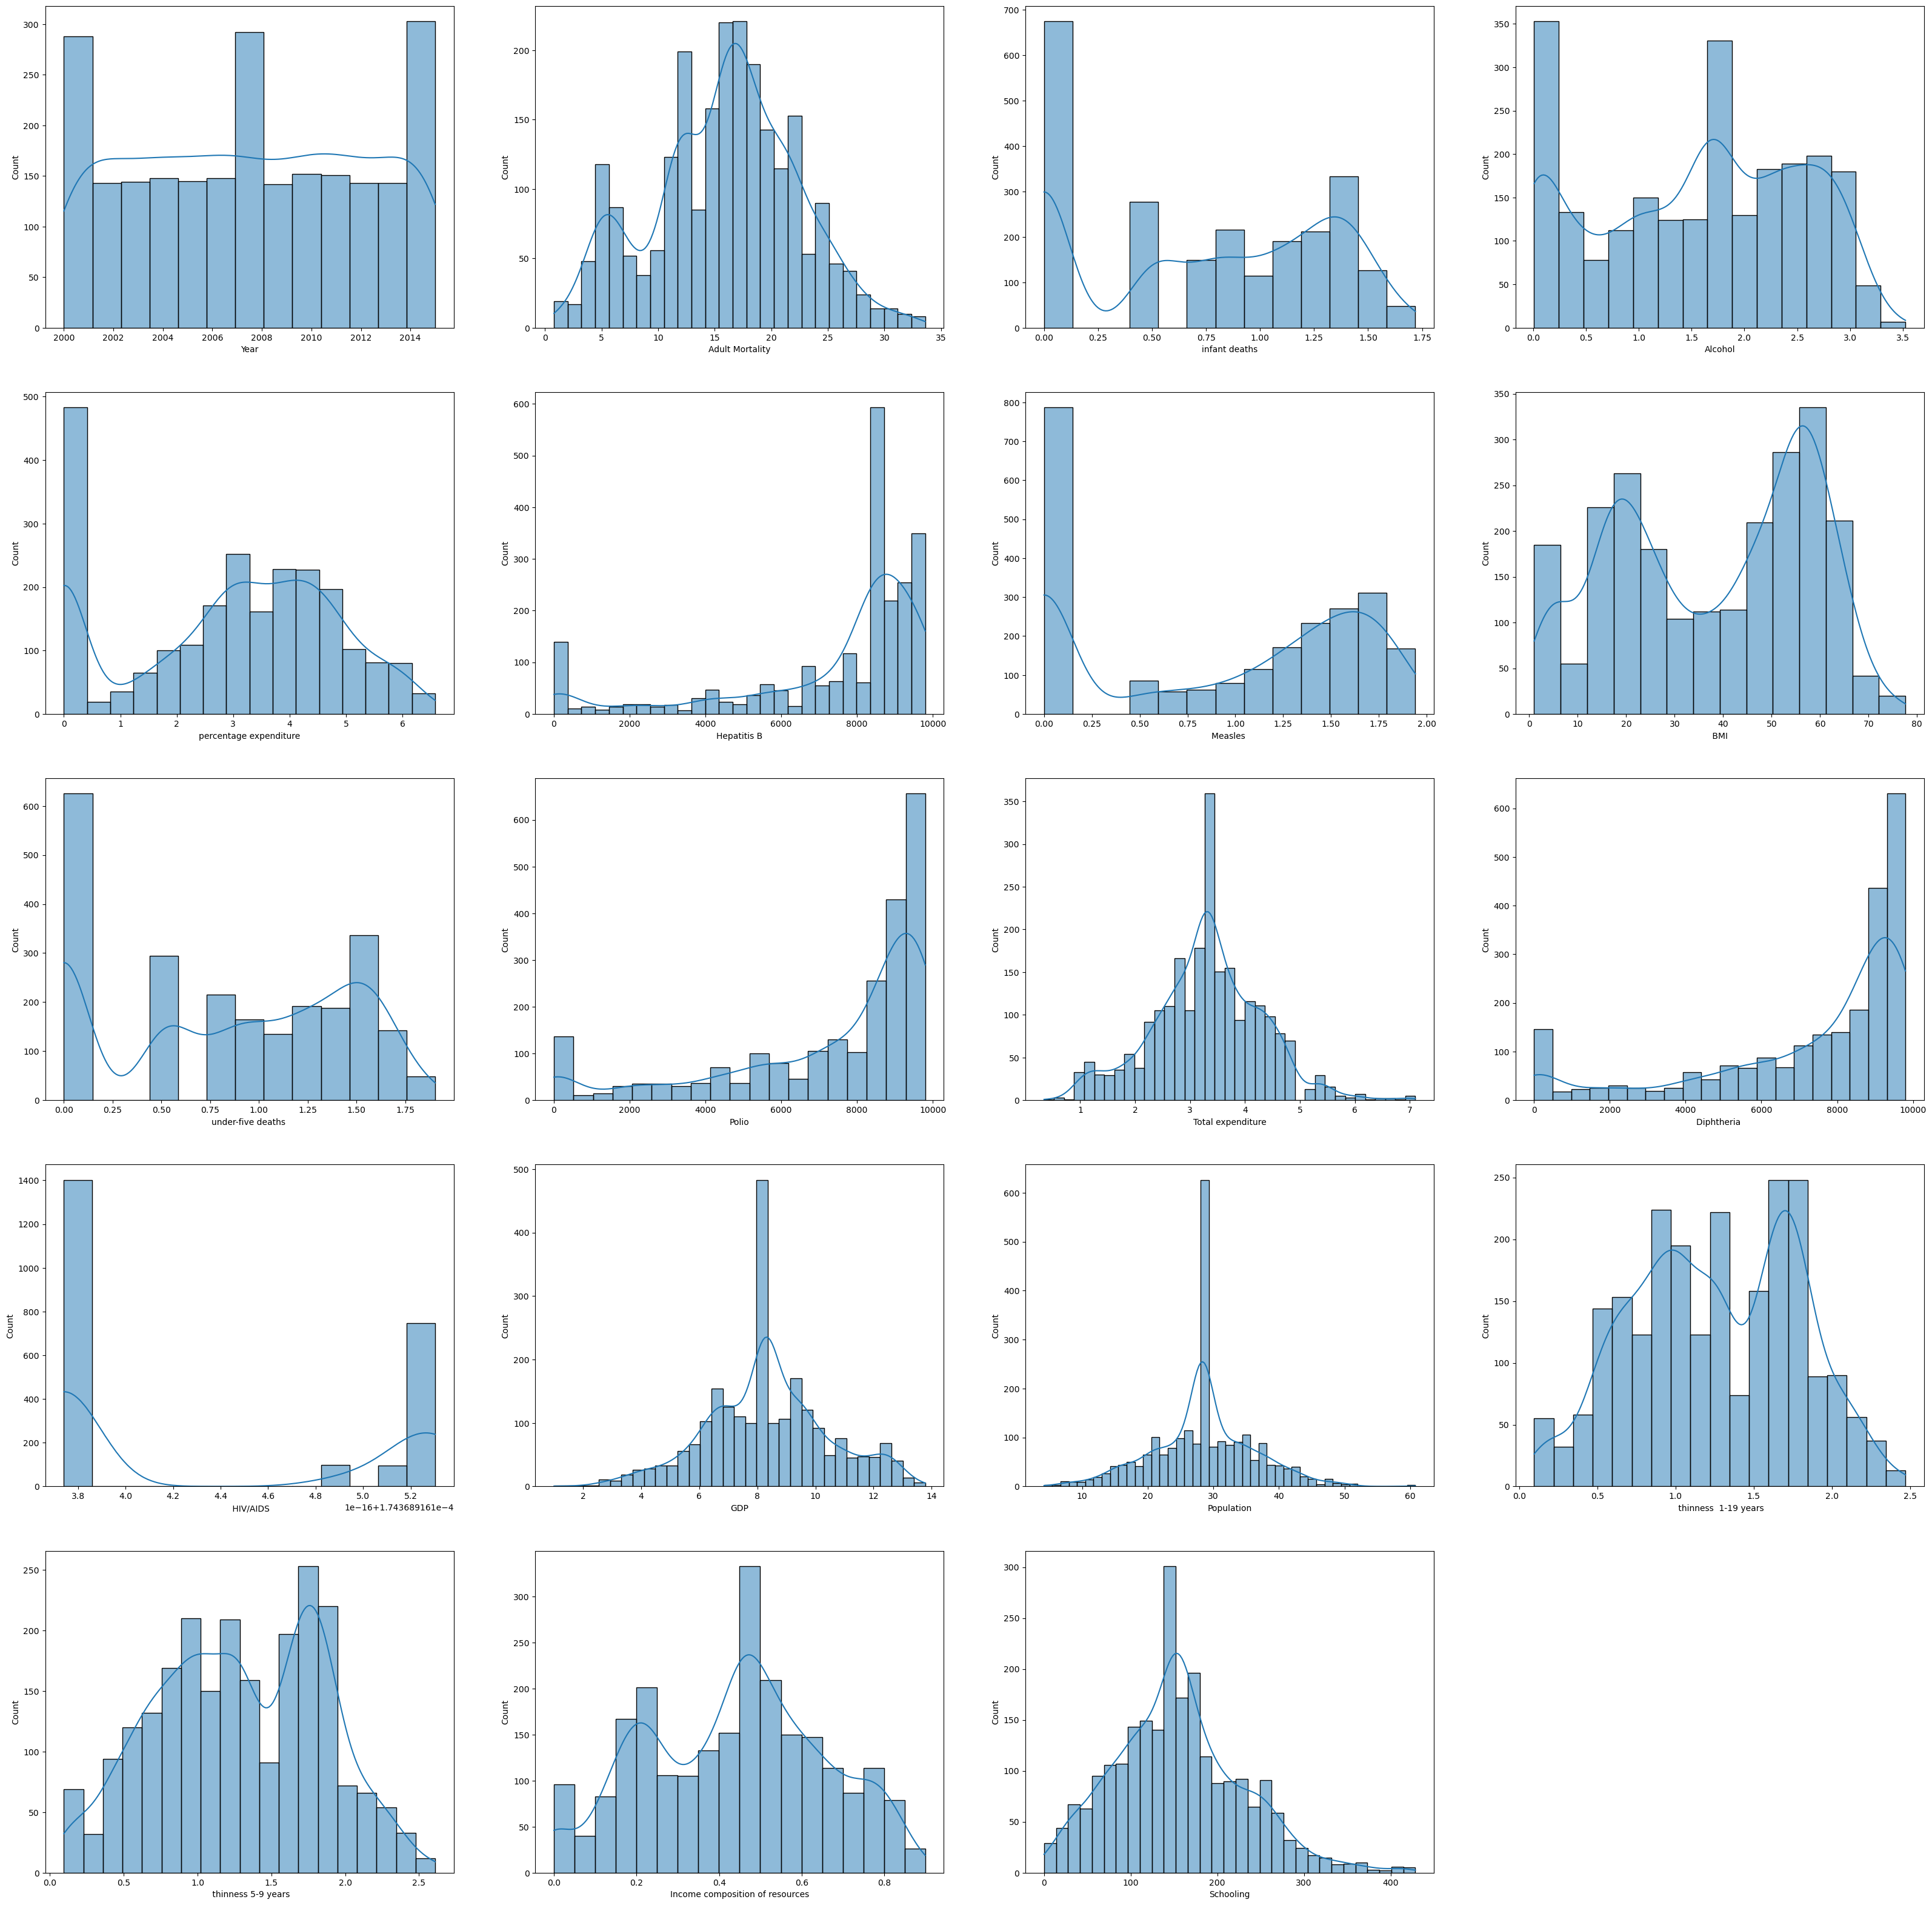

In [33]:
fig = plt.figure(figsize= (40, 40))
c = 1
for col in numeric_cols:
    plt.subplot(5, 4,c)
    g = sns.histplot(copy[col], kde=True)
    g.set(xlabel = col)
    c = c + 1

### Catagorical Data

In [38]:
categorical_cols = copy.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Country', 'Status'], dtype='object')


We have two categorical columns. To inspect these for distribution, we can use box plots of each category. However, for countries, we will generalise to region, given the huge number of categories otherwise.

In [39]:
# Dictionary mapping countries to their respective regions (continents)
country_to_region = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Bolivia (Plurinational State of)': 'South America', 
    'South Sudan': 'Africa', 'Finland': 'Europe', 'Cyprus': 'Europe', 'Uruguay': 'South America', 'Belize': 'North America',
    'United Republic of Tanzania': 'Africa', 'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia',
    'Bahrain': 'Asia', 'Ukraine': 'Europe', 'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania',
    'Cuba': 'North America', 'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa', 'Spain': 'Europe',
    'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America', 'Sao Tome and Principe': 'Africa',
    'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa',
    'Antigua and Barbuda': 'North America', 'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe',
    'Nigeria': 'Africa', 'Benin': 'Africa', 'The former Yugoslav republic of Macedonia': 'Europe',
    'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa', 'Trinidad and Tobago': 'North America', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Lithuania': 'Europe', 'Sudan': 'Africa', 'Costa Rica': 'North America',
    'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia', 'Sri Lanka': 'Asia',
    'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America', 'Panama': 'North America',
    'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia', 'Haiti': 'North America', 'Iraq': 'Asia',
    'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia', 'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America',
    'Maldives': 'Asia', 'Gabon': 'Africa', 'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa',
    'Niue': 'Oceania', 'Latvia': 'Europe', 'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa',
    'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania', 'Argentina': 'South America', 'Cambodia': 'Asia',
    'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia', 'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America',
    'Thailand': 'Asia', 'Bangladesh': 'Asia', 'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa',
    'Czechia': 'Europe', 'Niger': 'Africa', 'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia',
    'Jordan': 'Asia', 'Russian Federation': 'Europe', 'Syrian Arab Republic': 'Asia',
    'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania',
    'Palau': 'Oceania', 'Monaco': 'Europe', 'Dominica': 'North America'
}
# Add the 'Region' column based on the 'Country' column
def creat_Region_col(df, mapping=country_to_region):
    df["Region"] =df['Country'].map(country_to_region) 

#Apllying on copy
creat_Region_col(copy)

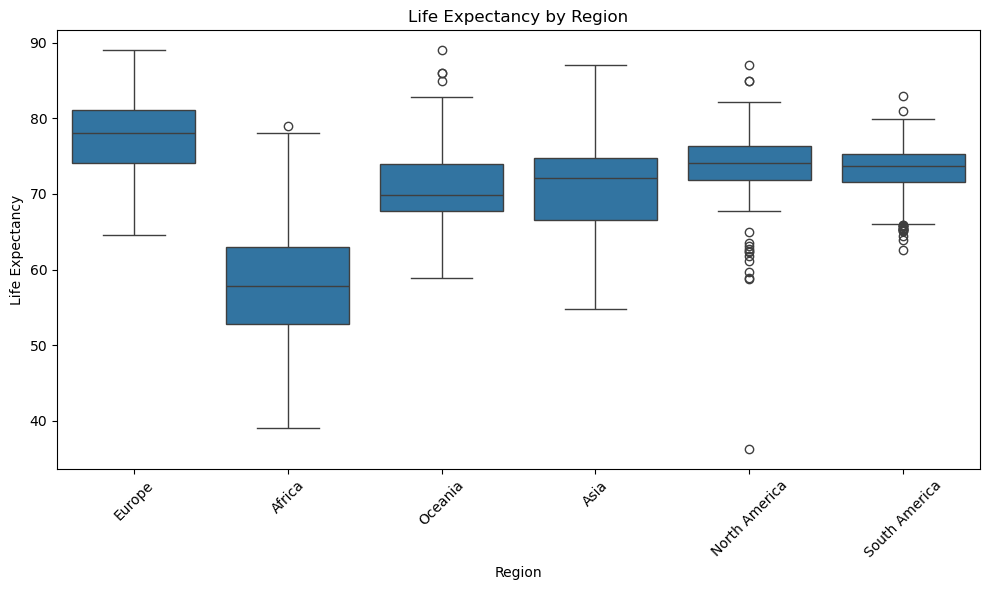

In [40]:
# Set up plot size
plt.figure(figsize=(10, 6))

# Create the boxplot to show the distribution of life expectancy per region
sns.boxplot(x='Region', y='Life expectancy ', data=copy)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
## Inspecting values within Status column

copy['Status'].value_counts()

Status
Developing    1937
Developed      405
Name: count, dtype: int64

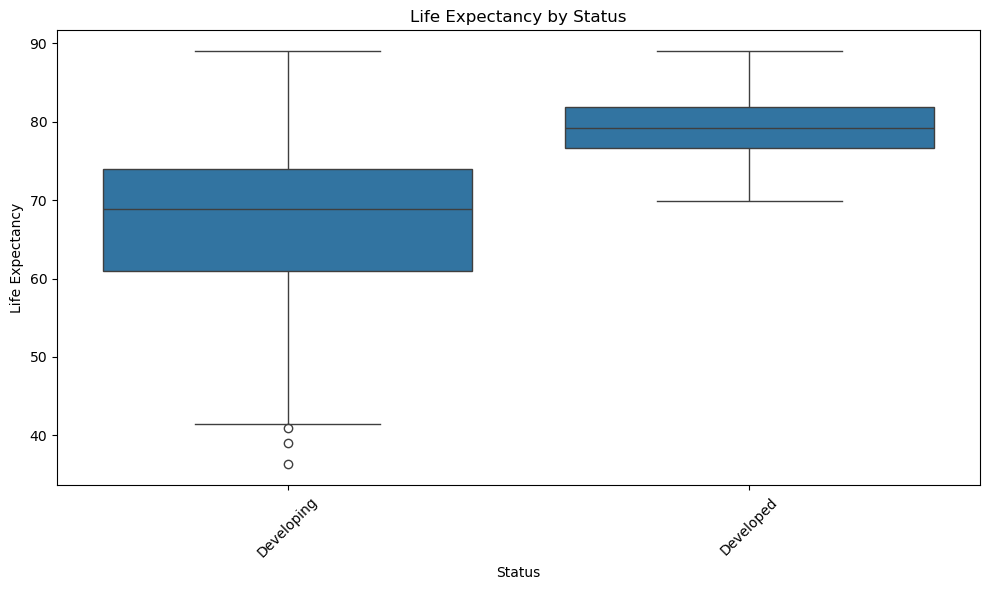

In [42]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot to show the distribution of life expectancy per status
sns.boxplot(x='Status', y='Life expectancy ', data=copy)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')

# Show the plot
plt.tight_layout()
plt.show()


These box plots show us that all of the catagories seem to be relatively normally distributed, so will will use this data untransformed.

## Correlation Plots

Before running our mulitvariate regression, we will inspect the individual regression plots for each numerical variable against one another. We use Peason's R to account for the fact that the data may not be completely normally distributed.

In [45]:
numeric_cols = copy.select_dtypes(include='number')
categorical_cols = copy.select_dtypes(include='object')

# Running correlation matrix 

correlation_matrix = numeric_cols.corr(method='pearson')

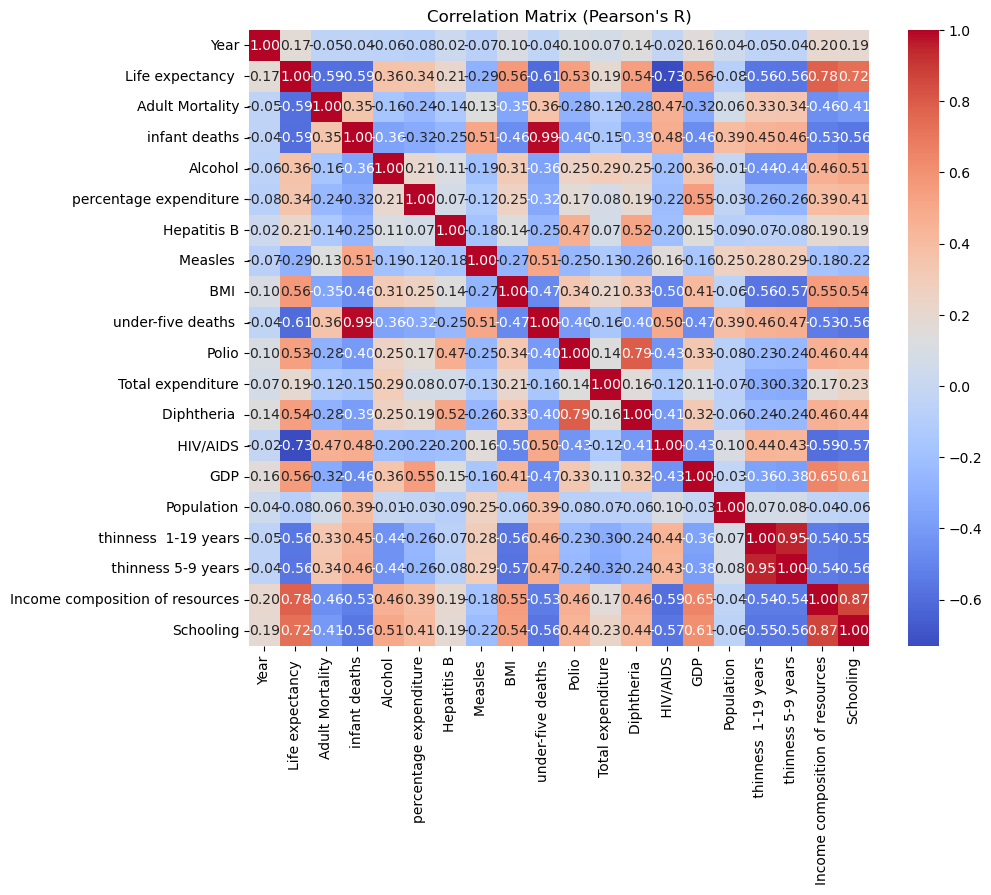

In [47]:
# Visualising the correlation in a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Pearson's R)")
plt.show()

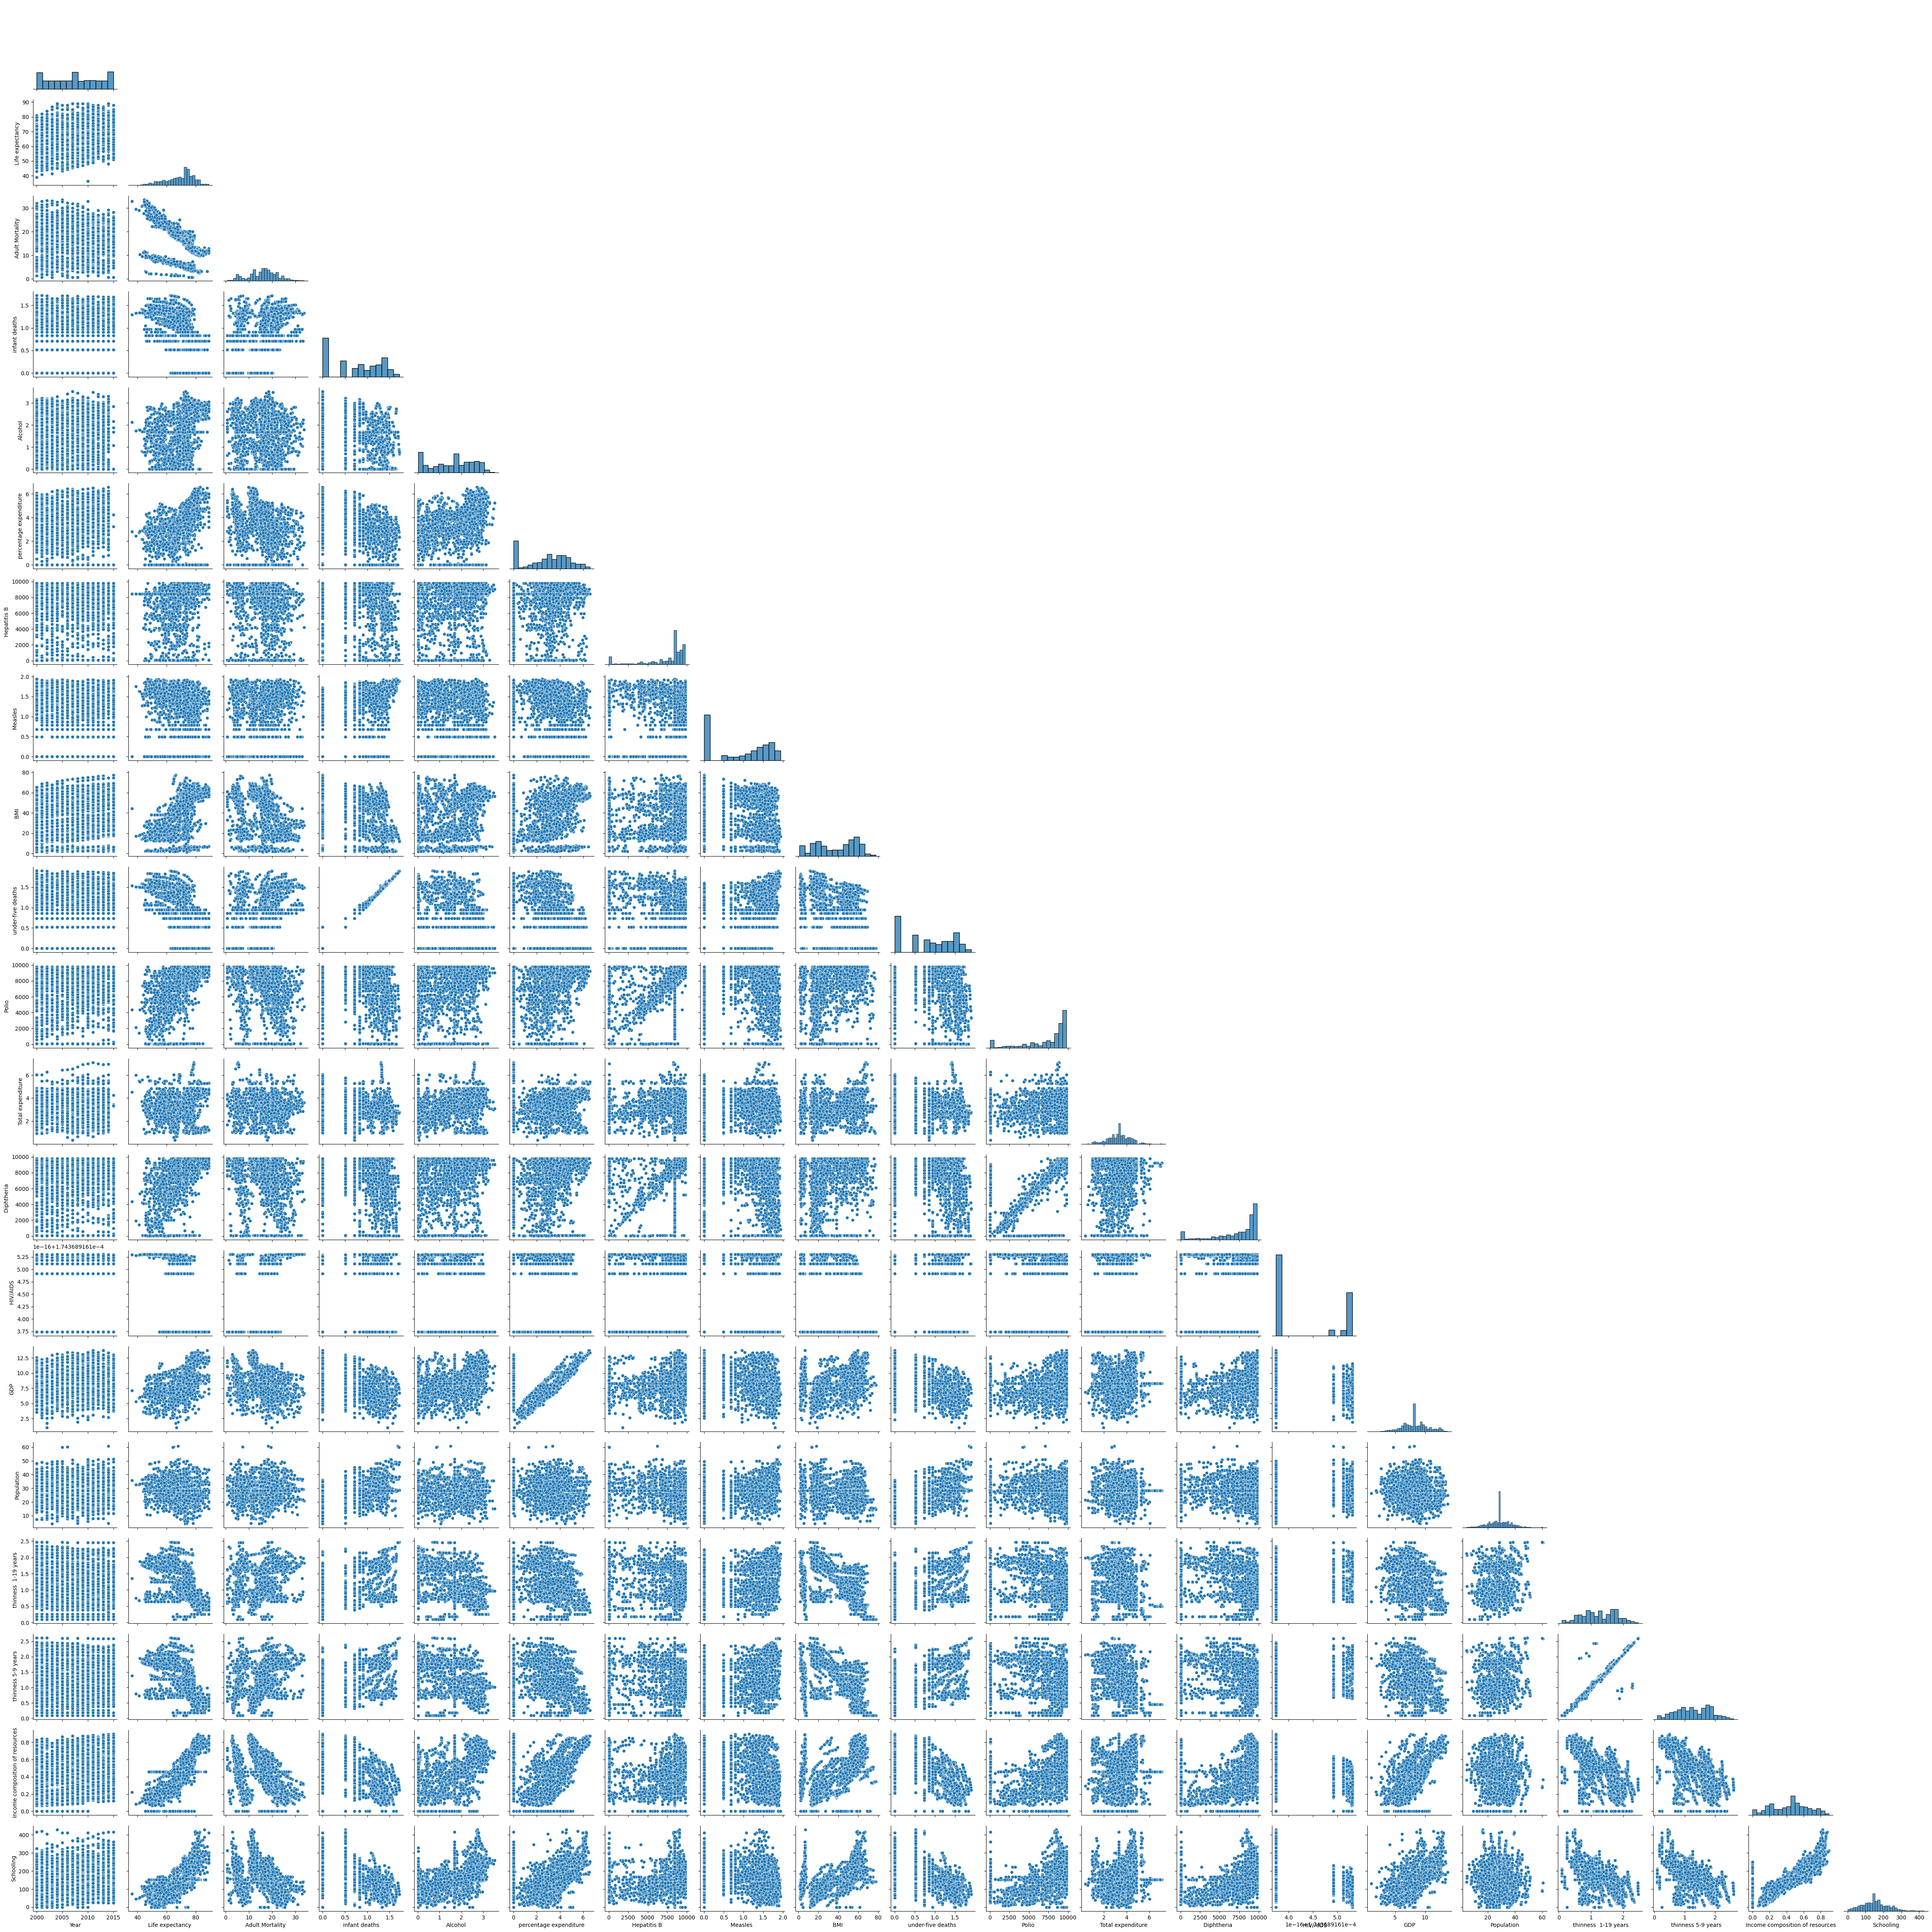

In [49]:
# Visualising the correlations through scatter plots

sns.pairplot(numeric_cols, diag_kind='hist', corner=True)

These plots suggest that income compsition of resouces and schooling have a strong positive correlation with life expactency and that HIV/AIDs has a strong negative correlation with Life expectency.

# Regression

First we will run a dummy regression to give our model something to compare against. Then we will set up our regression model.

## Dummy Regression

In [51]:
# Spliting the data into test and train columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Assigning columns to either numerical or catagorical lists
numeric_col = train_data.select_dtypes(include= "number").columns
cat_cols = X_train.select_dtypes(include = 'object').columns

In [52]:
strategy = 'median'

# Initialize the DummyRegressor
dummy_reg = DummyRegressor(strategy=strategy)

# "Train" the DummyRegressor (although no real training happens)
dummy_reg.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [53]:
y_pred = dummy_reg.predict(X_test)

In [54]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Dummy Regression Error: {rmse.round(2)}")

Dummy Regression Error: 9.62


Our dummy model has a RMSE of 9.62. 

### Pipeline for our Regression Model

In [56]:
# Pipeline for positive skewed features
positive_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer(method='yeo-johnson', standardize=False))
])

# Pipeline for negative skewed features
negative_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('cube_transformer', FunctionTransformer(np.square, validate=True))
])

# Pipeline for symmetric distributed features
symmetric_distributed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])


# Define the ColumnTransformer to combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('pos_skew', positive_skewed_pipeline, positive_skewed),
        ('neg_skew', negative_skewed_pipeline, negative_skewed),
        ('sym_dist', symmetric_distributed_pipeline, symmetric_distributed),
        ('cat', categorical_pipeline, cat_cols)
    ]
)

In [57]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [59]:
pipeline = Pipeline([
    ('regressor', LinearRegression())  # Use linear regression model
])

In [60]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 6.1991
R^2 Score: 0.9283


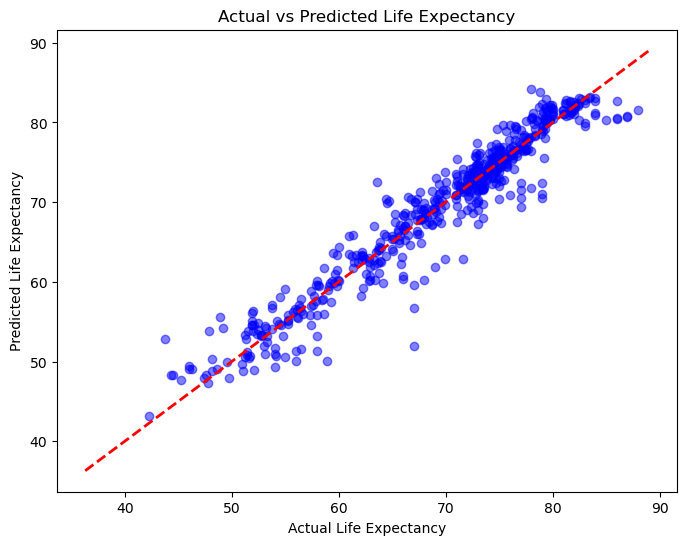

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)  # Ideal line
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()

Our regression produced a RMSE of 6.1991, lower than the 9.62 produced by the dummy model. The graph shows our predicted life expectany, aginst the actual life expectancy. If we had perfectly predicted the results, this would be a straight line. It is not. Therefore, we will now inspect the residuals (what we didn't predict through our model) to see if there are any underlying patterns that we may have missed.

## Model Inspection

In [65]:
# Predict on the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Compute residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# You can also calculate the Mean Squared Error (MSE) for reference
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 5.097227717639145
Test MSE: 6.199117080708203


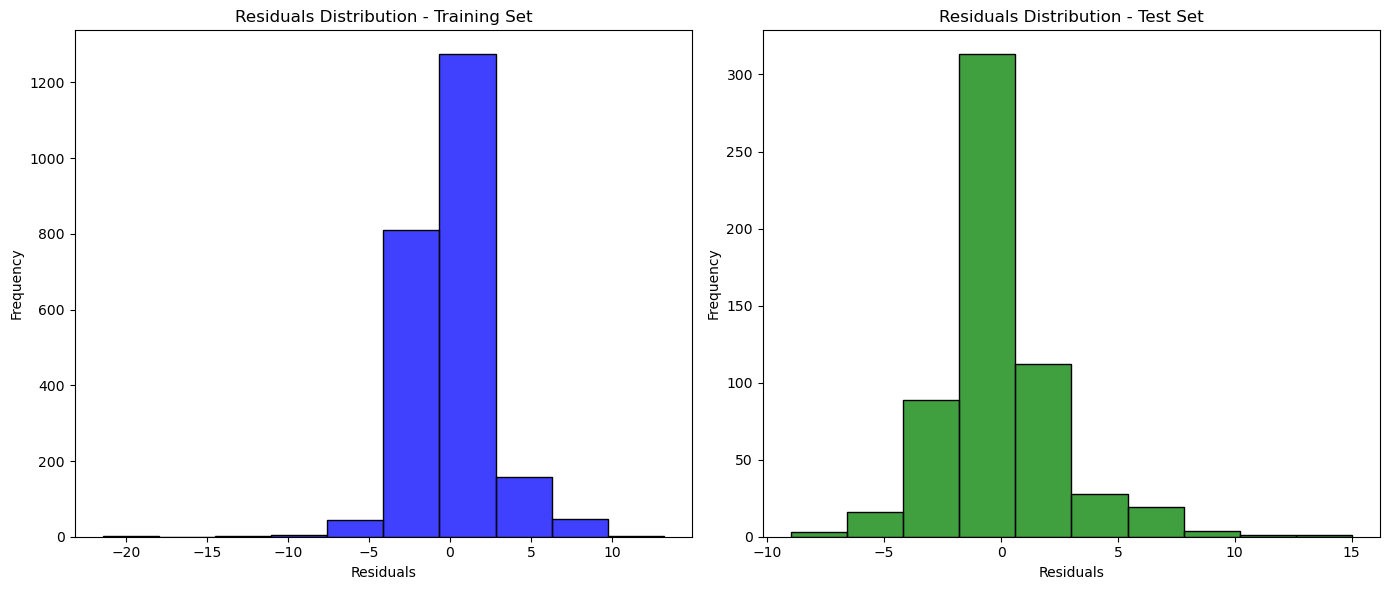

In [70]:
# Ploting a histogram for the residual distributions 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, bins=10, color='blue', kde=False)
plt.title('Residuals Distribution - Training Set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, bins=10, color='green', kde=False)
plt.title('Residuals Distribution - Test Set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


We can see that the residuals for both the test and training set are normally distributed. This is positive, as it suggets there are no underlying patters that we have missed in our selection of variables. 

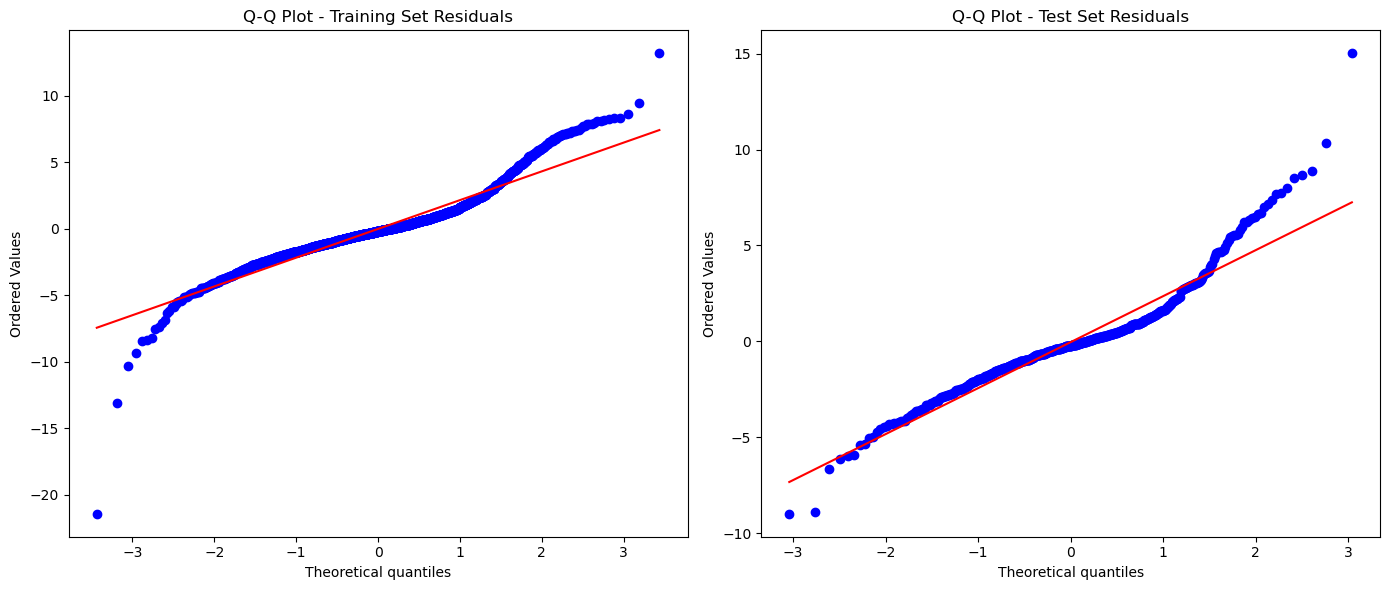

In [77]:
# Q-Q plot for residuals of the training set

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Training Set Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Test Set Residuals')

plt.tight_layout()
plt.show()


Here we can see that the residuals are vaguely symmertical around the line which is a good sign.

## Conclusions

Our multivariable linear regression model was able to predict life expectancy with:

**R² = 0.9283**

This suggests that the model explains **92.83%** of the variance in the target variable, which indicates a strong fit to the data.

The residuals from the model also appear to be normally distributed, suggested we haven't missed any crucial explanatory variables. Therefore, the rest of the variance may be explained by noise within the data, or by other variables outside our dataset. 

However, our model appears to be a good fit and perform well at modelling life expectancy.